https://stackoverflow.com/questions/57713358/how-to-rotate-skewed-fingerprint-image-to-vertical-upright-position

https://stackoverflow.com/questions/49907382/how-to-remove-whitespace-from-an-image-in-opencv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
map_1 = cv.imread("data/map_1.tif")

cv.imshow(winname = "map", mat = map_1)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
def show_map(img):
    fig, ax = plt.subplots(figsize = (20,10))
    ax.imshow(img)
    plt.show()

In [4]:
def rotate_crop_map(map_img):
    gray = cv.cvtColor(map_img, cv.COLOR_RGB2GRAY)
    gray = 255 - gray
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

    # Compute rotated bounding box
    coords = np.column_stack(np.where(thresh > 0))
    center_rect, dims, angle = cv.minAreaRect(coords)

    if angle < -45:
        angle = -angle
    else:
        angle = 90-angle
    print(angle)

    # Rotate image to deskew
    (h, w) = map_img.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv.warpAffine(map_img, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)

    gray = cv.cvtColor(rotated, cv.COLOR_BGR2GRAY)
    gray = 255*(gray < 128).astype(np.uint8) # To invert the text to white
    coords = cv.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv.boundingRect(coords) # Find minimum spanning bounding box
    rect = rotated[y:y+h, x:x+w] 
    rect = cv.cvtColor(rect, cv.COLOR_BGR2RGB)
    
    return rect

0.8036956787109375


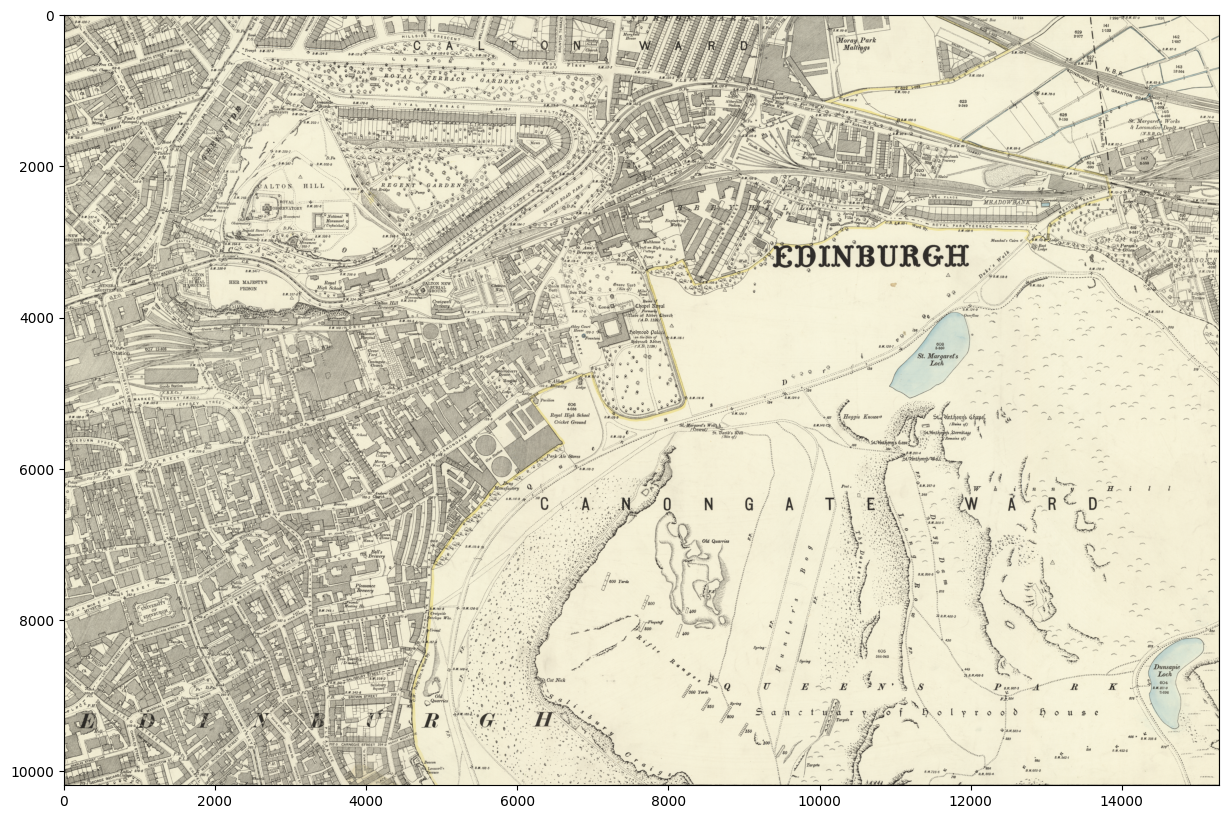

In [5]:
fix_map_1 = rotate_crop_map(map_1)
show_map(fix_map_1)